# Initial Debugging Notebook

Test out basic regression loss functions, link functions, and general BoostModel implementation using a scikit-learn LinearRegression model as the booster. Each run below should result in decreasing loss over model iterations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, scale
from sklearn.datasets import make_regression
from sklearn.base import clone as clone_model

from genestboost import BoostedModel
from genestboost.link_functions import *
from genestboost.loss_functions import *

%matplotlib inline

### Create Fake Dataset for Regression

In [2]:
X, y = make_regression(n_samples=10000,
                       n_features=30,
                       n_informative=30,
                       noise=1.0,
                       random_state=0)
X = scale(X)
y = scale(y)

### Test 1: Identity Link with Least Squares Loss 

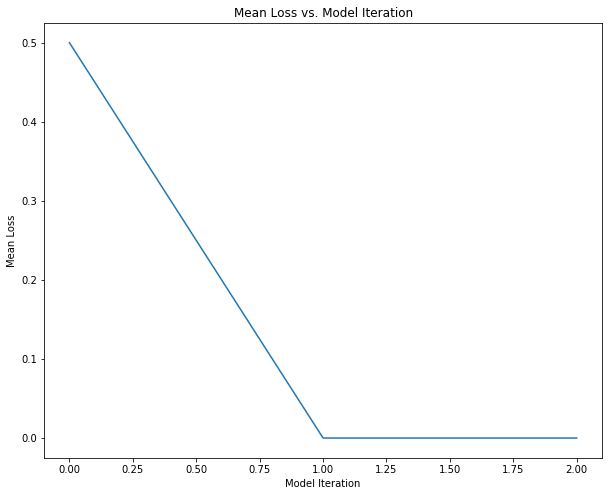

In [3]:
model = BoostedModel(link=IdentityLink(),
                     loss=LeastSquaresLoss(),
                     model_callback=LinearRegression)
model.fit(X, y, iterations=100)

# plot loss to make sure it is decreasing
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(pd.DataFrame(model.get_loss_history()).iloc[:, 0])
ax.set_title("Mean Loss vs. Model Iteration")
ax.set_xlabel("Model Iteration")
ax.set_ylabel("Mean Loss");

### Test 2: Identity Link with Least Squares Loss and Newton Weights

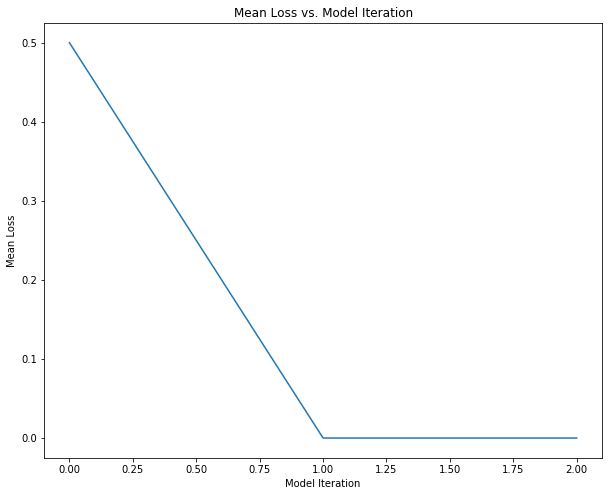

In [4]:
model = BoostedModel(link=IdentityLink(),
                     loss=LeastSquaresLoss(),
                     model_callback=LinearRegression,
                     weights="newton")
model.fit(X, y, iterations=100)

# plot loss to make sure it is decreasing
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(pd.DataFrame(model.get_loss_history()).iloc[:, 0])
ax.set_title("Mean Loss vs. Model Iteration")
ax.set_xlabel("Model Iteration")
ax.set_ylabel("Mean Loss");

### Test 2: Identity Link with Absolute Loss

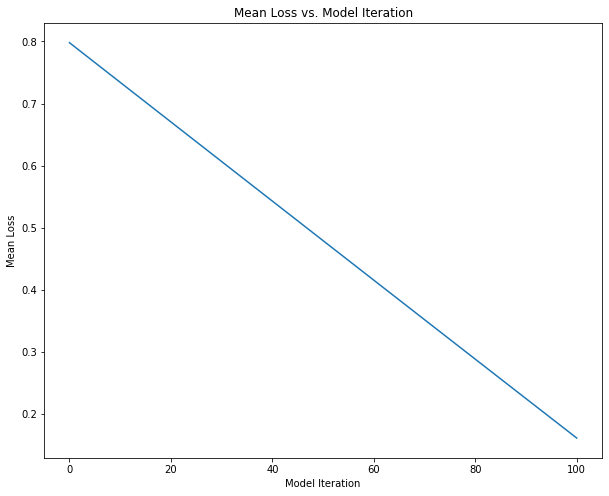

In [5]:
model = BoostedModel(link=IdentityLink(),
                     loss=AbsoluteLoss(),
                     model_callback=LinearRegression,
                     alpha=0.1)
model.fit(X, y, iterations=100)

# plot loss to make sure it is decreasing
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(pd.DataFrame(model.get_loss_history()).iloc[:, 0])
ax.set_title("Mean Loss vs. Model Iteration")
ax.set_xlabel("Model Iteration")
ax.set_ylabel("Mean Loss");

### Test 3: Identity Link with Log Cosh Loss

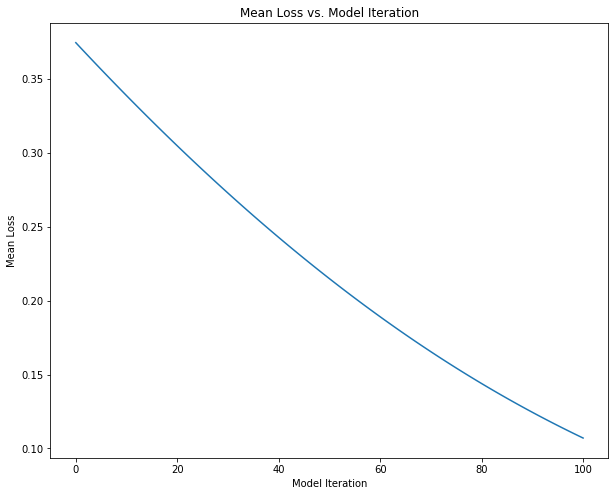

In [6]:
model = BoostedModel(link=IdentityLink(),
                     loss=LogCoshLoss(),
                     model_callback=LinearRegression,
                     alpha=0.1)
model.fit(X, y, iterations=100)

# plot loss to make sure it is decreasing
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(pd.DataFrame(model.get_loss_history()).iloc[:, 0])
ax.set_title("Mean Loss vs. Model Iteration")
ax.set_xlabel("Model Iteration")
ax.set_ylabel("Mean Loss");

### Test 4: Identity Link with Log Cosh Loss and Newton Weights

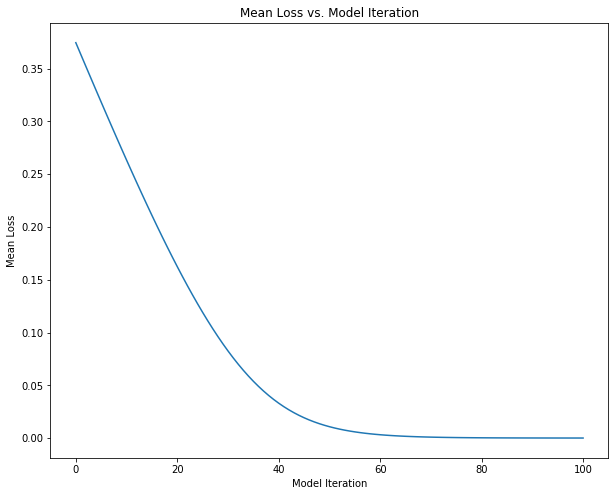

In [7]:
model = BoostedModel(link=IdentityLink(),
                     loss=LogCoshLoss(),
                     model_callback=LinearRegression,
                     alpha=0.25,
                     weights="newton")
model.fit(X, y, iterations=100)

# plot loss to make sure it is decreasing
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(pd.DataFrame(model.get_loss_history()).iloc[:, 0])
ax.set_title("Mean Loss vs. Model Iteration")
ax.set_xlabel("Model Iteration")
ax.set_ylabel("Mean Loss");

### Test 5: Identity Link with Quantile Loss - p = 0.5 (should approximately match AbsoluteLoss above)

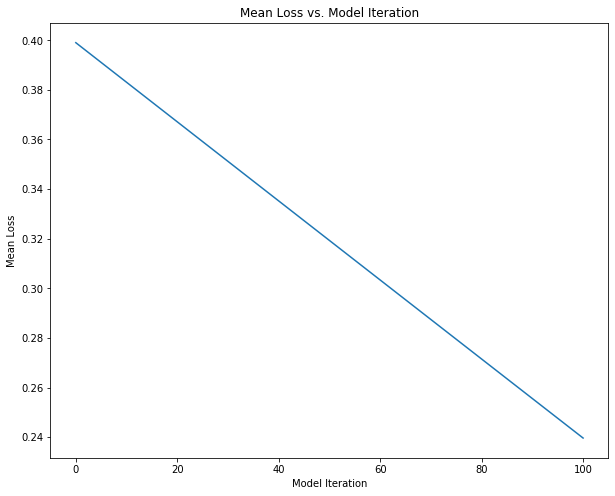

In [8]:
model = BoostedModel(link=IdentityLink(),
                     loss=QuantileLoss(p=0.5),
                     model_callback=LinearRegression,
                     alpha=0.1)
model.fit(X, y, iterations=100)

# plot loss to make sure it is decreasing
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(pd.DataFrame(model.get_loss_history()).iloc[:, 0])
ax.set_title("Mean Loss vs. Model Iteration")
ax.set_xlabel("Model Iteration")
ax.set_ylabel("Mean Loss");

### Test 6: Identity Link with Quantile Loss - p = 0.95

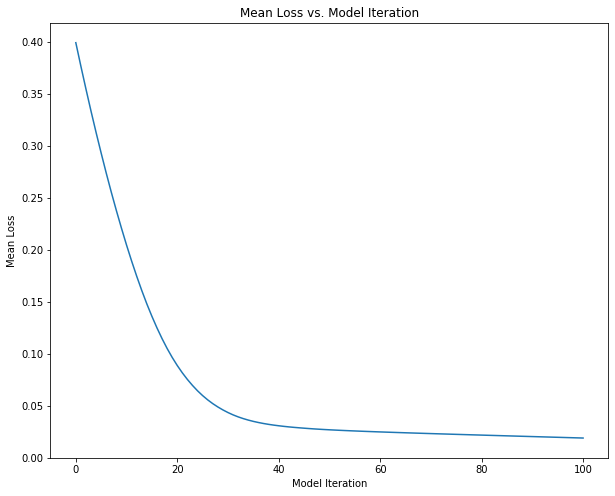

In [9]:
model = BoostedModel(link=IdentityLink(),
                     loss=QuantileLoss(p=0.95),
                     model_callback=LinearRegression,
                     alpha=0.25)
model.fit(X, y, iterations=100)

# plot loss to make sure it is decreasing
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(pd.DataFrame(model.get_loss_history()).iloc[:, 0])
ax.set_title("Mean Loss vs. Model Iteration")
ax.set_xlabel("Model Iteration")
ax.set_ylabel("Mean Loss");

In [10]:
model.predict(X)[:10]   # should be greater than below predicted

array([ 0.68475563, -0.8418433 ,  1.51385475,  1.78336398,  0.50169847,
        0.10023588, -0.16436001,  1.13177273,  1.59863666,  0.35501098])

### Test 7: Identity Link with Quantile Loss - p = 0.05

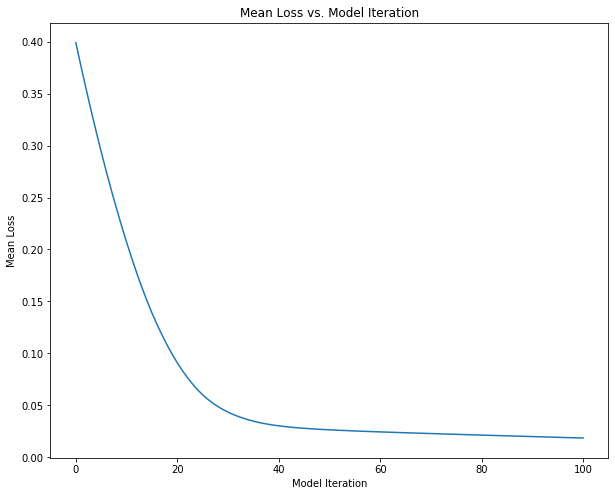

In [11]:
model = BoostedModel(link=IdentityLink(),
                     loss=QuantileLoss(p=0.05),
                     model_callback=LinearRegression,
                     alpha=0.25)
model.fit(X, y, iterations=100)

# plot loss to make sure it is decreasing
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(pd.DataFrame(model.get_loss_history()).iloc[:, 0])
ax.set_title("Mean Loss vs. Model Iteration")
ax.set_xlabel("Model Iteration")
ax.set_ylabel("Mean Loss");

In [12]:
model.predict(X)[:10]   # should be less than above predicted

array([-0.02026056, -1.60030642,  0.80952562,  1.06093826, -0.1932118 ,
       -0.62170999, -0.85746806,  0.44802526,  0.88551986, -0.37550197])